# Loss Functions

Loss functions are the way we define the goal of our neural network. Whenever we give a network a "correction" during training, that correction is based on the loss function. Sometimes the loss function is also called the objective function or cost function. 

Fundamentally a loss function quantifies how wrong our network was when it is making predictions during training. Training happens in a series of batches per epoch, and during each batch some number of examples (we specify how many) will be processed by the network, the loss function is typically an average or aggregate of some kind across these samples. 

In some cases machine learning experts will define custom loss functions, that capture domain specific details, but it is much more common to use one of a handful of well known loss functions. Broadly speaking, there are two categories of loss function, those used for **classification** and those used for **regression**.

Unlike activation functions, loss functions are not part of the neural network architecture. Instead they are part of the training process, lets see how one network can be trained with a different loss functions, starting with classification: 

In [1]:
# This should look familiar by now:
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, loss_function):
    figure = plt.figure()
    figure.suptitle(loss_function)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()
    
    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Using TensorFlow backend.


In [2]:
# We'll use this same model multiple times
def fresh_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    
    return model
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


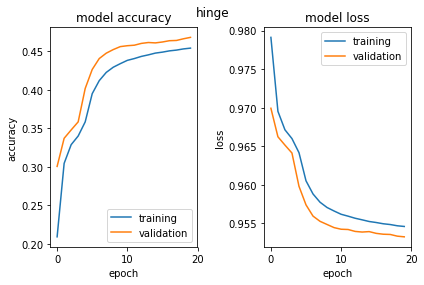

Test loss: 0.954
Test accuracy: 0.456
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


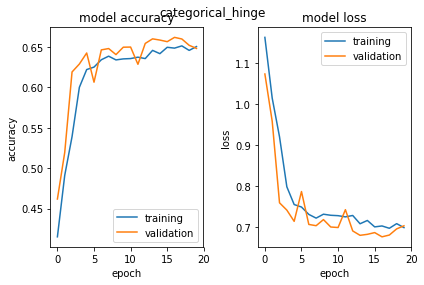

Test loss: 0.704
Test accuracy: 0.647


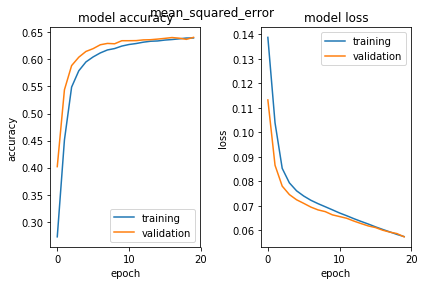

Test loss: 0.0593
Test accuracy: 0.626


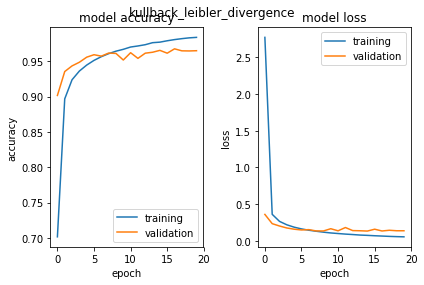

Test loss: 0.178
Test accuracy: 0.96


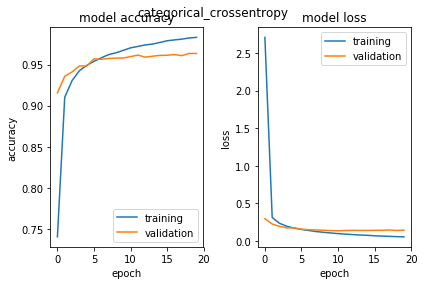

Test loss: 0.173
Test accuracy: 0.957


In [3]:
# For classification, Keras has several loss functions for classification
# Not all of the loss functions are designed for classification problems, such as mean_squared_error
# but we can still tell keras to use those functions, though the results may not be great
# There are also some special loss functions that are specific to binary classification. 
# Lets look at some that are:
loss_functions = [
    'hinge',
    'categorical_hinge',
    'mean_squared_error',
    'kullback_leibler_divergence',
    'categorical_crossentropy'
]

histories = []

for loss_function in loss_functions:
    model = fresh_model()
    model.compile(optimizer="sgd", loss=loss_function, metrics=['accuracy'])
    history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    plot_training_history(history, model, loss_function)
    histories.append(history)

As we can see, the choice of a loss function can have a very significant impact on a model's performance. Categorical cross entropy is the most common choice for classification tasks, a good rule of thumb is to just start there and explore others only when nessesary. 

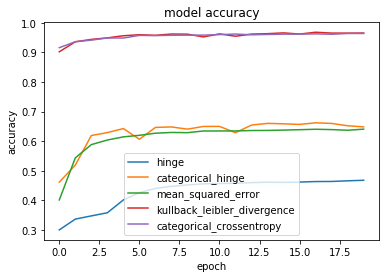

In [4]:
# Cleaner visulizations all in one place
for loss_function, history in zip(loss_functions, histories):
    plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loss_functions, loc='best')
plt.show()